In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline

In [21]:
# Load the dataset
df = pd.read_csv('heart.csv')

In [22]:
# Display basic info
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (303, 14)

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


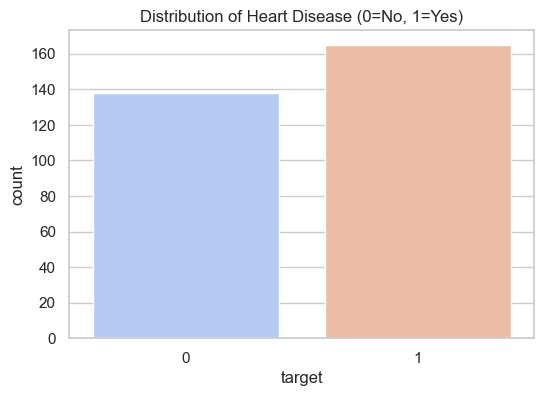

In [23]:
# Visualizing the Target Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, hue='target', palette='coolwarm', legend=False)
plt.title('Distribution of Heart Disease (0=No, 1=Yes)')
plt.show()

In [24]:
# Define Features (X) and Target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features (Important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully split and scaled.")

Data successfully split and scaled.


In [25]:
# 1. Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# 2. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

print("Both models trained.")

Both models trained.


In [26]:
# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

y_pred_dt = dt_model.predict(X_test_scaled)
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# Calculate Metrics
acc_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

acc_dt = accuracy_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

# Print Summary
print(f"Logistic Regression -> Accuracy: {acc_lr:.2f}, AUC: {auc_lr:.2f}")
print(f"Decision Tree       -> Accuracy: {acc_dt:.2f}, AUC: {auc_dt:.2f}")

Logistic Regression -> Accuracy: 0.85, AUC: 0.93
Decision Tree       -> Accuracy: 0.75, AUC: 0.76


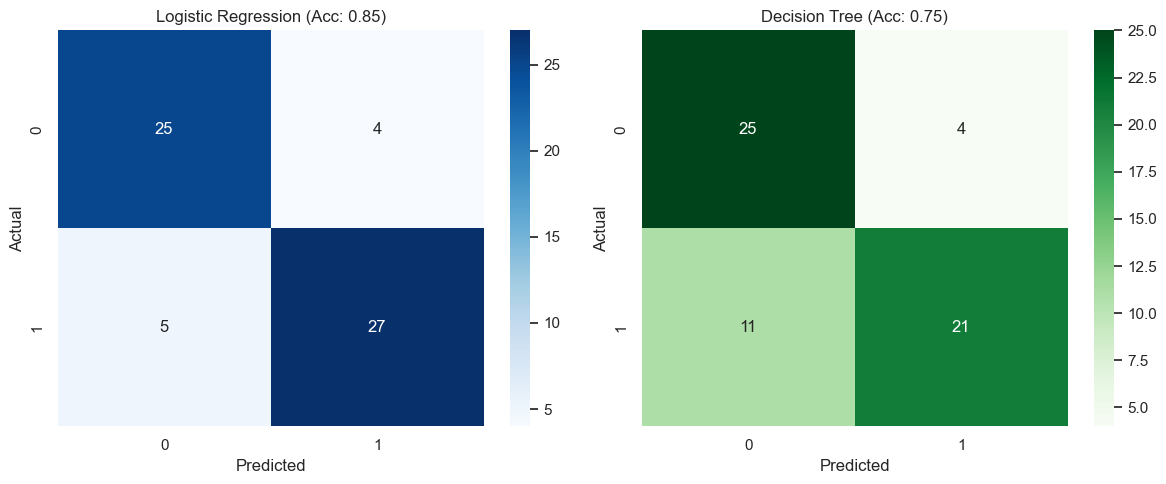

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Logistic Regression (Acc: {acc_lr:.2f})')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Decision Tree Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title(f'Decision Tree (Acc: {acc_dt:.2f})')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')


plt.tight_layout()
plt.show()

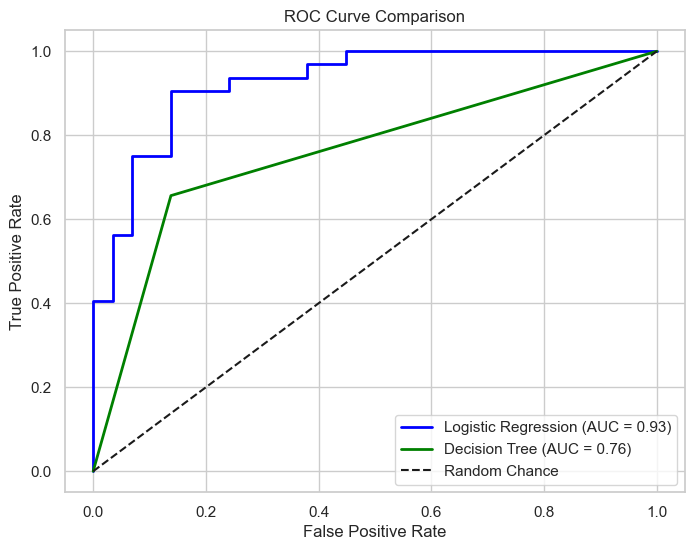

In [31]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue', lw=2)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='green', lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

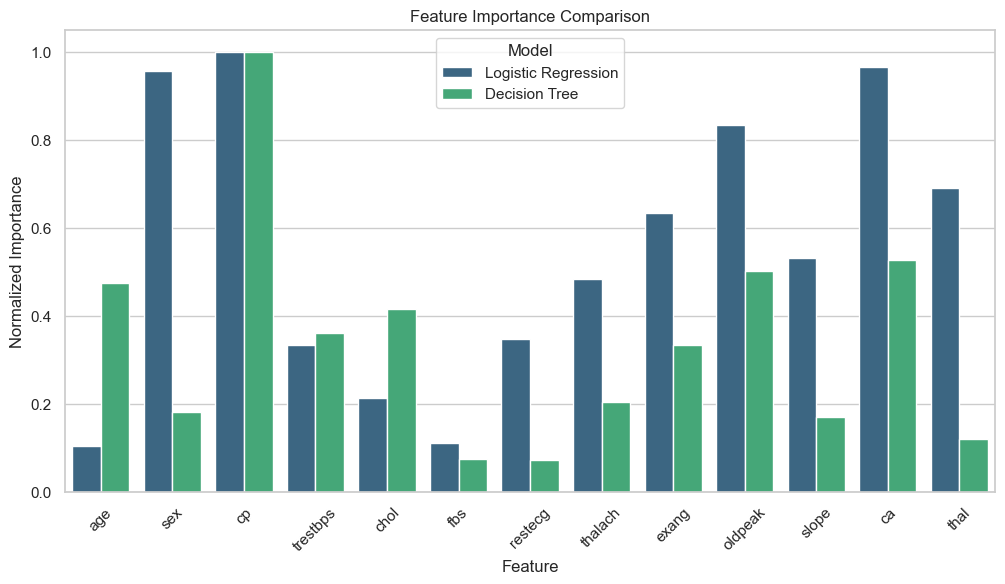

In [34]:
# Normalize importance scores for comparison
lr_imp = abs(lr_model.coef_[0])
lr_imp = lr_imp / lr_imp.max()

dt_imp = dt_model.feature_importances_
dt_imp = dt_imp / dt_imp.max()

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Logistic Regression': lr_imp,
    'Decision Tree': dt_imp
})

# Reshape for plotting
importance_df = importance_df.melt(id_vars='Feature', var_name='Model', value_name='Normalized Importance')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Normalized Importance', hue='Model', data=importance_df, palette='viridis')
plt.title('Feature Importance Comparison')
plt.xticks(rotation=45)
plt.show()

In [35]:
# --- Final Performance Summary ---

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [acc_lr, acc_dt],
    'ROC AUC': [auc_lr, auc_dt]
})

# Format the metrics as percentages/decimals
summary_df['Accuracy'] = summary_df['Accuracy'].apply(lambda x: f"{x:.2%}")
summary_df['ROC AUC'] = summary_df['ROC AUC'].apply(lambda x: f"{x:.2f}")

# Display the table
print("\n=== Final Model Performance Summary ===")
display(summary_df)

# Determine the best model
best_model = summary_df.loc[summary_df['ROC AUC'].astype(float).idxmax()]
print(f"\nBest Performing Model: {best_model['Model']} (AUC: {best_model['ROC AUC']})")


=== Final Model Performance Summary ===


,Model,Accuracy,ROC AUC
0,Logistic Regression,85.25%,0.93
1,Decision Tree,75.41%,0.76



Best Performing Model: Logistic Regression (AUC: 0.93)
